In [2]:
# Linear regression in Tensorflow

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf


# Parametru 

learning_rate = 0.01 
training_epochs = 200
display_step = 10



In [3]:
# Generowanie zestawu danych

train_X = np.linspace(-1, 1, 101)
train_Y = train_X * 2 + np.random.randn(*train_X.shape) * 0.3+ 2 * np.random.randn() * train_X.shape[0]

In [14]:
x=  tf.placeholder(tf.float32, shape = (None, ), name= "x")
y= tf.placeholder(tf.float32, shape = (None,), name = "y")


W = tf.Variable(np.random.randn(), name = "Weight")
b = tf.Variable(np.random.randn(), name =  "Bias")

In [17]:
# Wywołanie wszystkich zmiennnych
y_pred = tf.add(tf.multiply(W, x), b)
init = tf.global_variables_initializer()

In [18]:
# Funkcja kosztu - linear regression

# Definicja funkcji kosztu
cost = tf.reduce_mean(tf.square(y_pred -y))


# Funkcja minimalizująca funkcję kosztu 

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)


# minimalizacja funkcji kosztu z wykorzystaniem optimizera
train_op = optimizer.minimize(cost)

# Log kontrolujacy progres


log_str = "Epoch: {:03d} cost = {:.10f} W={:.9f} b={:.9f}"



In [19]:
with tf.Session() as sess:
    sess.run(init)
    
    pred_Y_init = sess.run(y_pred, {x: train_X})
    
    for epoch in range(training_epochs):
        
        cost_t, W_t, b_t, _ = sess.run([cost, W, b, train_op], 
                                      feed_dict = {x: train_X, y:train_Y})
        
        if epoch % display_step == 0:
            print(log_str.format(epoch +1, cost_t, W_t, b_t))
            
    pred_Y_final = sess.run(y_pred, {x: train_X})

Epoch: 001 cost = 5175.0258789062 W=0.299757630 b=-14.417451859
Epoch: 011 cost = 59.9946632385 W=1.159658074 b=-65.782218933
Epoch: 021 cost = 0.8229535818 W=1.584871292 b=-71.297470093
Epoch: 031 cost = 0.0920019820 W=1.795135975 b=-71.889663696
Epoch: 041 cost = 0.0716545656 W=1.899110079 b=-71.953254700
Epoch: 051 cost = 0.0685050562 W=1.950524449 b=-71.960083008
Epoch: 061 cost = 0.0677560046 W=1.975948334 b=-71.960815430
Epoch: 071 cost = 0.0675730407 W=1.988520384 b=-71.960884094
Epoch: 081 cost = 0.0675284714 W=1.994737148 b=-71.960884094
Epoch: 091 cost = 0.0675173178 W=1.997811198 b=-71.960884094
Epoch: 101 cost = 0.0675147548 W=1.999331355 b=-71.960884094
Epoch: 111 cost = 0.0675140768 W=2.000082970 b=-71.960884094
Epoch: 121 cost = 0.0675138608 W=2.000454903 b=-71.960884094
Epoch: 131 cost = 0.0675139129 W=2.000638723 b=-71.960884094
Epoch: 141 cost = 0.0675137863 W=2.000729322 b=-71.960884094
Epoch: 151 cost = 0.0675137639 W=2.000774622 b=-71.960884094
Epoch: 161 cost = 0.

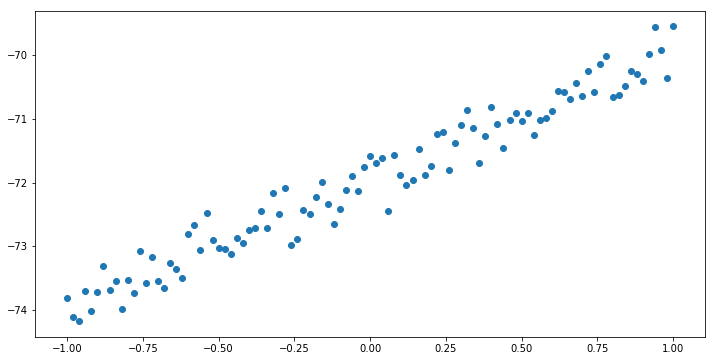

In [20]:
plt.rc('figure', figsize = (12, 6))
plt.scatter(train_X, train_Y)
plt.show()

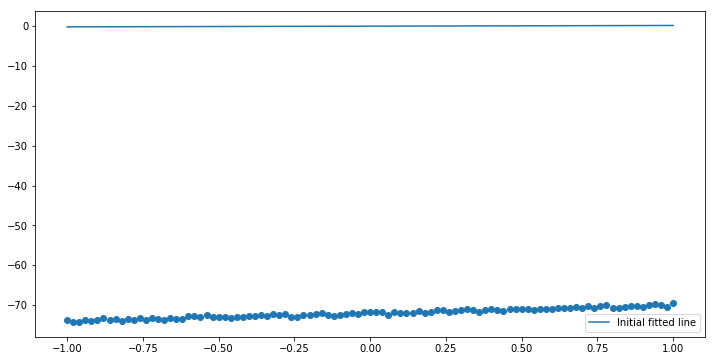

In [21]:
plt.rc('figure', figsize = (12,6))
fig = plt.figure(1)
plt.scatter(train_X, train_Y)
plt.plot(train_X, pred_Y_init, label = 'Initial fitted line')
plt.legend(loc = 0)
plt.show()